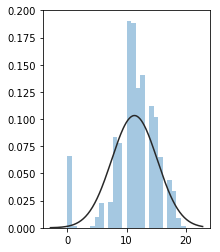

Linear Regression 


 Average RMSE: 3.4929394212802247
+----+-----------+------------+----------+------------+--------------+
|    |       age |    famsize |     Medu |       Fedu |   traveltime |
|----+-----------+------------+----------+------------+--------------|
|  0 | -0.121681 | -0.0966787 | 0.178193 | -0.0461007 |    -0.165348 |
+----+-----------+------------+----------+------------+--------------+
+----+-------------+------------+----------+------------+-----------+
|    |   studytime |   failures |   famrel |   freetime |     goout |
|----+-------------+------------+----------+------------+-----------|
|  0 |    0.341487 |    -1.1902 | 0.101946 | -0.0282696 | -0.339057 |
+----+-------------+------------+----------+------------+-----------+
+----+-----------+-----------+-----------+------------+-----------+
|    |      Dalc |      Walc |    health |   absences |     sex_F |
|----+-----------+-----------+-----------+------------+-----------|
|  0 | -0.227087 | 0.0643463 | -0.28

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split
from tabulate import tabulate

warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan) #to print all the elements of a matrix
#pd.set_option('display.max_rows', 2000)#to print all the elements of a data frame
pd.set_option('display.max_columns', 2000)#to print all the elements of a data frame

%matplotlib inline
    
student_mat = pd.read_csv("student-mat.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
student_por = pd.read_csv("student-por.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

from sklearn import preprocessing

original = student_mat.append(student_por)

students = student_mat.append(student_por)
#le = preprocessing.LabelEncoder()
#le.fit_transform(students)

#print(students.head())
#print(students.info())

#removing unnecessary features
students.drop('address',axis=1, inplace=True)
students.drop('G1', axis=1, inplace=True)
students.drop('G2', axis=1, inplace=True)
students.drop('school', axis=1, inplace=True)
students.drop('reason', axis=1, inplace=True)


# taking a look in the distribution of our response variable
plt.tight_layout()
plt.figure(figsize=(3,4))
sns.distplot(students['G3'],fit=norm, kde=False, axlabel='');
plt.show()


famsize = {'LE3':'2',  'GT3':'6'}    
students.famsize = students.famsize.map(famsize)
students.famsize = students.famsize.astype('int64')


students = pd.get_dummies(students)
students.drop("internet_no",axis=1,inplace=True)
students.drop("paid_no",axis=1,inplace=True)
students.drop("activities_yes",axis=1,inplace=True)
students.drop("higher_no",axis=1,inplace=True)
students.drop("romantic_yes",axis=1,inplace=True)
students.drop("sex_M",axis=1,inplace=True)
students.drop("schoolsup_yes",axis=1,inplace=True)
students.drop("famsup_yes",axis=1,inplace=True)
students.drop("nursery_yes",axis=1,inplace=True)
students.drop("Pstatus_T",axis=1,inplace=True)
 


from sklearn.linear_model import LinearRegression


print("Linear Regression \n")

x_train = students.drop('G3',axis=1)
y_train = students['G3']


#Cross validation
classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train.iloc[training,:].values)
    x_test_fold = scaler.transform(x_train.iloc[test,:].values)
    
    y_train_fold = y_train[training,np.newaxis]
    y_test_fold = y_train[test,np.newaxis]
    
    classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

#print(x_train.columns)
#print(classifierLinearRegression.coef_)

data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = classifierLinearRegression.coef_
print(tabulate(data.iloc[:,0:5],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,5:10],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,10:15],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,15:20],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,20:25],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,25:30],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,30:35],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,35:40],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,40:45],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,45:50],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,50:55],headers='keys', tablefmt='psql'))

#To calculate the p-values of beta coefficients: 
#from regressors import stats
#print("coef_pval:\n", stats.coef_pval(classifierLinearRegression, x_train, y_train))

# to print summary table:
#print("\n=========== SUMMARY ===========")
#xlabels = students.columns
#stats.summary(classifierLinearRegression, x_train, y_train, xlabels)


# Interesting results about final grades


## Question 1 - What is the impact of the parental matrimonial status?


Based on our analysis we discovered that there is a sligthly (0.05) increment in the final grade of a student if their parents are divorced. This is a counter-intuitive result  that can maybe be explained by the extra atention the student would receive.


## Question 2 - Educational level of father and mother 

Here we can infer another interesting fact. The level of eduction of the mother has a positive impact in the final grade by 0.17 for each level greater. However, the father's level of education has a negative influence. Maybe this can be explained by the fact that successful men tend to be more absent and women in general are always more present and can cause a good influence.  

## Question 3 - Time of study, internet and past failures

As expected, more time of study increase the chance of a good grade by 0.3 for each aditional hour, and past failures lead to smaller present grades. No internet at home decreases by 0.2 the final grade and having internet increases by 0.25.

## Question 4 - Alcohol consuption 

Daily bases consuption of alcohol beaverages is related with a decrease in the final grade by 0.17, on the other hand weekend consuption is related with an increase by 0.046. Being happy matters. 

## Question 5 - The two most influent

Finally, lets take a look in the two features that have the greater impact.

Whether the student has extra paid classes within the course subject does not make difference and parent are wasting money. In our analysis we found a negative correlation of 0.46 which means that if the student is doing bad probably extra classes wont make difference. 

On the other hand, the desire of taking a higher degree course in the future increase the final grade by 0.44 points.

